[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17Rqvx5LU_KTMkuc75PXgepm7oRePLaYR#scrollTo=hlYvyvC6x2Ov)





# **Store Sales - Time Series Forecasting**
This is a  competition of Kaggke, whwere we will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. 

## Miembros del grupo:
- Juan Felipe Vásquez Uribe.Estudiante de Ingeniería Mecánica
- Jhon David Ballesteros Vargas. Estudiante de Ingeniería de Sistemas
- Natalia Polo Peña. Estudiante de Ingeniería Electónica

## Datos

Los datos del proyecto vienen de La competición Kaggle  [Sales Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data)


#Consideraciones importantes acerca del problema:
- Los salarios en el sector público se pagan cada dos semanas el día 15 y el último día del mes. Las ventas de los supermercados podrían verse afectadas por esto.
- Un terremoto de magnitud 7,8 golpeó a Ecuador el 16 de abril de 2016. La gente se unió a los esfuerzos de socorro donando agua y otros productos de primera necesidad que afectaron enormemente las ventas de los supermercados durante varias semanas después del terremoto.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar Dataset

In [ ]:
#Leer los archivos .csv
train = pd.read_csv("train.csv")
holidays = pd.read_csv("holidays_events.csv")
oil = pd.read_csv("oil.csv")
stores = pd.read_csv("stores.csv")
transactions=pd.read_csv('transactions.csv')
test=pd.read_csv("test.csv")

# Convertir las columnas de fecha en formato de fecha
train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)
transactions["date"] = pd.to_datetime(transactions.date)
holidays["date"]=pd.to_datetime(holidays.date)
holidays=holidays.set_index('date')

#Descripción del Dataset Train

# Descripción del Dataset Transactions
Transacciones significa cuántas personas vinieron a la tienda o cuántas facturas se crearon en un día <br>
Ventas da las ventas totales de una familia de productos en una tienda en particular en una fecha determinada.

In [ ]:
#Fixing date column type , should be datetime
transactions["date"]= pd.to_datetime(transactions["date"])
transactions 

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


# Descripción del Dataset Oil Price

El siguiente código muestra información sobre los datos en los dataframes y respectivamente, la cantidad de filas y columnas, y el tipo de datos de cada columna.train_fixed.info()traintrain_fixed

train_fixed es un nuevo dataframe, que contiene únicamente las filas que cumplen las siguientes condiciones:train. 
train_fixed["sales"].sum() calcula la suma de la columna "sales" en el dataframe .train_fixed

display(train_fixed) muestra el dataframe completo en el output del notebook o consola, permitiendo revisar detalladamente los datos que cumplen las condiciones seleccionadas.train_fixed 

In [ ]:
oil
oil['dcoilwtico'].isna().sum() #muestra todos los valores en NaN
oil[oil['dcoilwtico']==0] #muestra todos los valores donde el precio es =0

,date,dcoilwtico


In [ ]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [ ]:
# train.info()
# train_fixed.info()
train_fixed = train[(train["store_nbr"]==9) & (train["date"]>='2017-08-15') & (train["date"]<'2017-08-16')]
print(train_fixed["sales"].sum())
display(train_fixed)


0.0


,id,date,store_nbr,family,sales,onpromotion


In [ ]:
filter1 = transactions[(transactions["date"]=="2017-08-15") & (transactions["store_nbr"]==9)]
#crea un nuevo DataFrame llamado 'filter1transactions.


In [ ]:
df = train.head(5)
df

# test = df.join(stores,lsuffix="_train",rsuffix="_store")
# test = pd.merge(df,stores,on="store_nbr",how="inner")
# test


In [ ]:
temp = pd.merge(train.groupby(["date", "store_nbr"]).sales.sum().reset_index(), transactions, how = "left")
temp

## Descripcción del Dataset Holidays
El Dataset muestra los días especiales en Ecuador desde el 3/02/2012 al 26/12/2017. <br>
La columna ```type``` se refiere a si la celebración es: 
- Evento: dia de la madre, terremoto, mundial futbol, etc
- Puente: a la gente se le da Navidad y primer día del año
- Dia de trabajo: días que se recupera los días de puente (01 ene - 25 dic)
- Día Feriado
- Transferido: una celebración que se celebra tardíamente
- Adicional: días antes o después de una celbración 

La columna ```locale``` indica si la celebración es a nivel local, regional o nacional <br>
La columna ```locale_name ``` hace referencia a la ciudad o provincia de donde es la celbración <br>
La columna  ```description ``` indica el nombre de la celbración <br>
La columna  ```transferred ``` indica si es un días festivo que se aplaza para otro día a modo de puente festivo.  <br>

#### Distribución de la columnas ```type``` y ```locale``` <br>
Más de la mitad de los eventos son de tipo Holiday. La  mitad de los eventos son de tipo nacional

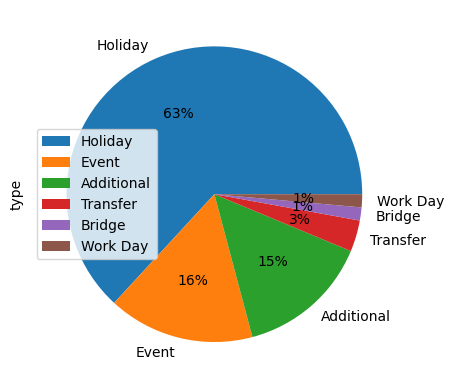

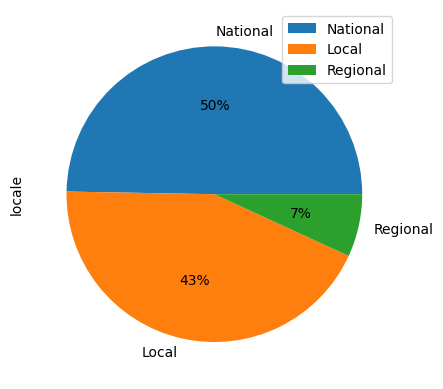

In [ ]:
#Distribución del tipo de evento
type=holidays['type'].value_counts().to_frame().plot(kind='pie',y='type',autopct='%1.0f%%')
locale=holidays['locale'].value_counts().to_frame().plot(kind='pie',y='locale',autopct='%1.0f%%')




Generar un Dataset de Holidays agregando el total de ventas que se realizaron en esos días

In [ ]:
holidays_sales=pd.merge(holidays,train.groupby('date').sum().sales,left_index=True, right_index=True)
holidays_sales

<ipython-input-16-c1b8aaa87125>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  holidays_sales=pd.merge(holidays,train.groupby('date').sum().sales,left_index=True, right_index=True)


,type,locale,locale_name,description,transferred,sales
date,,,,,,
2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,2.511619e+03
2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False,4.773501e+05
2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False,4.032582e+05
2013-02-11,Holiday,National,Ecuador,Carnaval,False,2.786276e+05
2013-02-12,Holiday,National,Ecuador,Carnaval,False,3.088008e+05
...,...,...,...,...,...,...
2015-12-23,Additional,National,Ecuador,Navidad-2,False,1.196146e+06
2015-12-24,Additional,National,Ecuador,Navidad-1,False,1.083680e+06
2015-12-26,Additional,National,Ecuador,Navidad+1,False,9.467252e+05


<ipython-input-36-50c7fe2d346a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  holidays_sales.groupby('type').sum().plot.bar(y='sales')
<ipython-input-36-50c7fe2d346a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  holidays_sales.groupby('locale').sum().plot.bar(y='sales')


<Axes: xlabel='locale'>

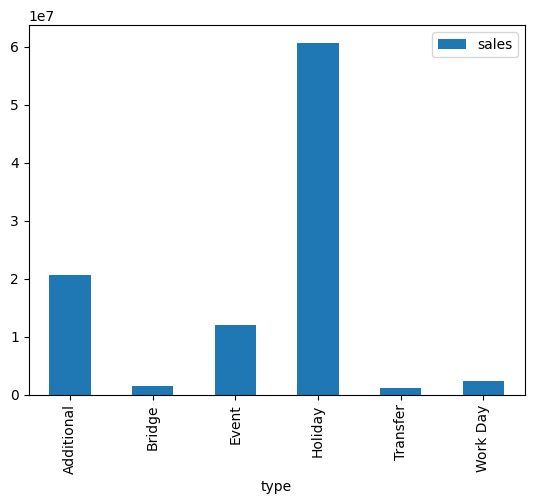

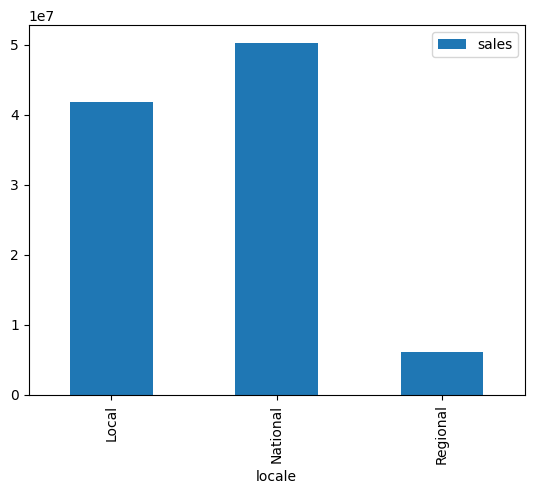

In [ ]:
holidays_sales.groupby('type').sum().plot.bar(y='sales')
holidays_sales.groupby('locale').sum().plot.bar(y='sales')

#a=holidays_sales.groupby('type').sum().sales
#plt.bar(a.index,a)

<ipython-input-35-01fd6fd90d9c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=holidays_sales.groupby('type').sum().sales


<BarContainer object of 6 artists>

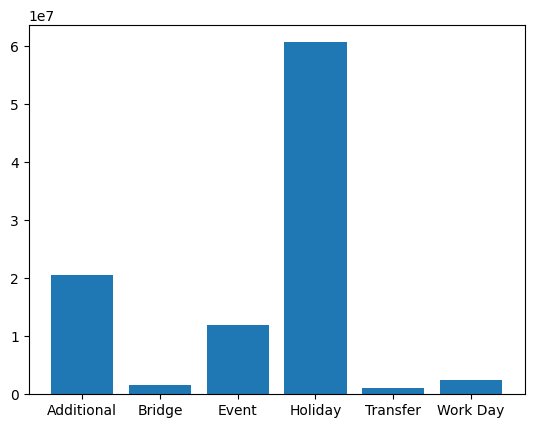

## Dataset Test 
Esta Dataset contiene los datos de la tienda, la familia de prductos y la cantidad de productos en promoción desde el 16 de agosto de 2017 al 31 de agosto de ese mismo año. El reto es predecir las ventas para esos días
 

In [ ]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [ ]:
#a=holidays[(holidays["date"]>='2016-08-16') & (holidays["date"]<='2016-08-31')]
#holidays.loc["date"]>='2016-08-16'

KeyError: ignored

### Fechas festivas en el periodo a predecir
Solo se tienen con dos eventos festivos 
- el 15 de agosto: Fundación de Riobamba 
- el 24 de agosto Fundación de Ambato

In [ ]:
print(holidays.loc['2017-08-15':'2017-09-02'])
#print(holidays.loc['2015-08-15':'2015-09-02'])
#print(holidays.loc['2014-08-15':'2014-09-02'])
#print(holidays.loc['2013-08-15':'2013-09-02'])

               type locale locale_name            description  transferred
date                                                                      
2017-08-15  Holiday  Local    Riobamba  Fundacion de Riobamba        False
2017-08-24  Holiday  Local      Ambato    Fundacion de Ambato        False


In [ ]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


Descripción del Dataset Stores

In [ ]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15
